TREINAMENTO DO MODELO DE DETECÇÃO DE LETRAS EM LIBAS

In [11]:
# IMPORT
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [12]:
# Parâmetros
IMG_SIZE = 32
BATCH_SIZE = 32
EPOCHS = 50
DATASET_DIR = "../dataset"

# Data Augmentation + Normalização
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False
)

# Dados de treino
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='training'
)

# Dados de validação
val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Mapeamento das classes (letras)
class_indices = train_generator.class_indices
print("Mapeamento das classes:", class_indices)

Found 5919 images belonging to 21 classes.
Found 1472 images belonging to 21 classes.
Mapeamento das classes: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'i': 7, 'l': 8, 'm': 9, 'n': 10, 'o': 11, 'p': 12, 'q': 13, 'r': 14, 's': 15, 't': 16, 'u': 17, 'v': 18, 'w': 19, 'y': 20}


In [13]:
# Salvar mapeamento para uso posterior
import json
with open('../models/class_indices.json', 'w') as f:
    json.dump(class_indices, f)

In [14]:
# Modelo CNN aprimorado
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\edufa\miniconda3\envs\tf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,621 (631.33 KB)

 Trainable params: 161,621 (631.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


c:\Users\edufa\miniconda3\envs\tf310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2309 - loss: 2.5265
Epoch 1: val_loss improved from inf to 0.95605, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.2317 - loss: 2.5235 - val_accuracy: 0.6630 - val_loss: 0.9561
Epoch 2/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6301 - loss: 1.1235
Epoch 2: val_loss improved from 0.95605 to 0.75845, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.6306 - loss: 1.1224 - val_accuracy: 0.7364 - val_loss: 0.7585
Epoch 3/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7637 - loss: 0.7849
Epoch 3: val_loss improved from 0.75845 to 0.57075, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7640 - loss: 0.7836 - val_accuracy: 0.8118 - val_loss: 0.5708
Epoch 4/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8202 - loss: 0.5666
Epoch 4: val_loss improved from 0.57075 to 0.56953, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8203 - loss: 0.5665 - val_accuracy: 0.8105 - val_loss: 0.5695
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8433 - loss: 0.4848
Epoch 5: val_loss improved from 0.56953 to 0.52243, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8434 - loss: 0.4847 - val_accuracy: 0.8512 - val_loss: 0.5224
Epoch 6/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8677 - loss: 0.4158
Epoch 6: val_loss improved from 0.52243 to 0.42668, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8678 - loss: 0.4154 - val_accuracy: 0.8668 - val_loss: 0.4267
Epoch 7/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8945 - loss: 0.3471
Epoch 7: val_loss improved from 0.42668 to 0.36458, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8947 - loss: 0.3466 - val_accuracy: 0.8668 - val_loss: 0.3646
Epoch 8/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9025 - loss: 0.3033
Epoch 8: val_loss improved from 0.36458 to 0.33904, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9025 - loss: 0.3032 - val_accuracy: 0.8961 - val_loss: 0.3390
Epoch 9/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9118 - loss: 0.2727
Epoch 9: val_loss improved from 0.33904 to 0.33342, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9118 - loss: 0.2727 - val_accuracy: 0.8899 - val_loss: 0.3334
Epoch 10/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9350 - loss: 0.2286
Epoch 10: val_loss did not improve from 0.33342
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9350 - loss: 0.2287 - val_accuracy: 0.8777 - val_loss: 0.3827
Epoch 11/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9365 - loss: 0.2203
Epoch 11: val_loss improved from 0.33342 to 0.31096, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9365 - loss: 0.2202 - val_accuracy: 0.9008 - val_loss: 0.3110
Epoch 12/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9321 - loss: 0.2344
Epoch 12: val_loss improved from 0.31096 to 0.29628, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9321 - loss: 0.2342 - val_accuracy: 0.9090 - val_loss: 0.2963
Epoch 13/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9425 - loss: 0.1874
Epoch 13: val_loss did not improve from 0.29628
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9426 - loss: 0.1873 - val_accuracy: 0.9042 - val_loss: 0.3293
Epoch 14/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9463 - loss: 0.1729
Epoch 14: val_loss improved from 0.29628 to 0.25673, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9463 - loss: 0.1729 - val_accuracy: 0.9171 - val_loss: 0.2567
Epoch 15/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9558 - loss: 0.1640
Epoch 15: val_loss did not improve from 0.25673
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9558 - loss: 0.1639 - val_accuracy: 0.9083 - val_loss: 0.3038
Epoch 16/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9554 - loss: 0.1562
Epoch 16: val_loss improved from 0.25673 to 0.16342, saving model to ../models/best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.9554 - loss: 0.1562 - val_accuracy: 0.9443 - val_loss: 0.1634
Epoch 17/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9656 - loss: 0.1232
Epoch 17: val_loss did not improve from 0.16342
185/185 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.9656 - loss: 0.1232 - val_accuracy: 0.9409 - val_loss: 0.1878
Epoch 18/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9665 - loss: 0.1128
Epoch 18: val_loss did not improve from 0.16342
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9664 - loss: 0.1129 - val_accuracy: 0.9151 - val_loss: 0.2479
Epoch 19/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9657 - loss: 0.1168
Epoch 19: val_loss did not improve from 0.16342
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9657 - loss: 0.1168 - val_accuracy: 0.9423 - val_loss: 0.2065
Epoch 20/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9662 - loss: 0.1082
Epoch 20: val_loss did not im

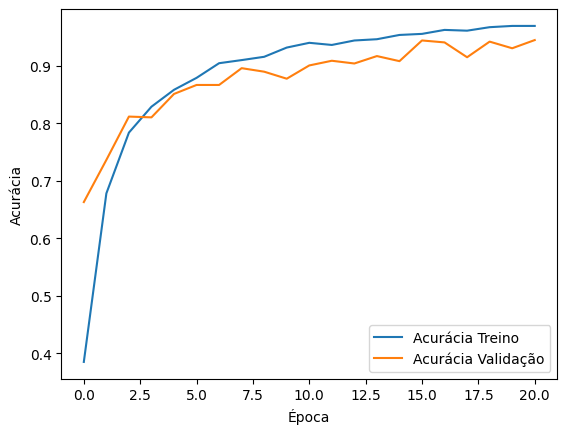

In [15]:
# Treinamento com early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint(
    filepath='../models/best_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

# Plot dos resultados
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [16]:
# Salva o modelo treinado
model.save('../models/asl_gesture_model2.h5')
print("Modelo salvo como 'asl_gesture_model2.h5'")

Modelo salvo como 'asl_gesture_model2.h5'
